This notebook is an analysis of the leaked Conti ransomeware group chats. The messages date from 2020 to 2021.
https://github.com/TimAngevare/ContiRansomeware_Analysis

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Import and inspect our data

In [486]:
chats = pd.read_csv('chat.csv')
chats.head(20)

,Unnamed: 0,ts,from,to,body,body_en,body_language
0,0,2021-08-23T06:17:46.326321,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
1,1,2021-08-23T06:21:29.401324,driver@q3mcco35auwcstmt.onion,defender@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
2,2,2021-08-23T06:43:20.480030,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
3,3,2021-08-23T06:43:46.773096,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
4,4,2021-08-23T06:44:22.941040,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
5,5,2021-08-23T06:45:20.386289,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
6,6,2021-08-23T08:00:32.458165,bentley@q3mcco35auwcstmt.onion,many@q3mcco35auwcstmt.onion,"Привет, бро. Криптанем длл?","Hi, bro. Kriptanem dll?",sr
7,7,2021-08-23T08:49:29.453987,tom@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,[15:37:46] <many@q3mcco35auwcstmt.onion> скинь...,[15:37:46]<many@q3mcco35auwcstmt.onion> throw ...,ru
8,8,2021-08-23T08:49:29.527162,tom@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,),),en
9,9,2021-08-23T09:24:27.533674,mentos@q3mcco35auwcstmt.onion,tunri@q3mcco35auwcstmt.onion,привет,Hey,NaN


In [487]:
# remove errors
filtered_chats = chats[chats['body_en'] != '[Error: The message is encrypted and cannot be decrypted.]']

Convert date to date and what is our date range?

In [208]:
chats['ts'] = pd.to_datetime(chats['ts'])
print(chats['ts'].min(), 'to', chats['ts'].max())

2021-01-29 00:06:46.929363 to 2022-03-02 18:02:33.731867


# Who is talking?

How many individuals are there from and to?

In [6]:
chats[['from', 'to']].nunique()

from    274
to      341
dtype: int64

How many unique individuals were chatting?

In [250]:
def to_name(email):
    return email.split('@')[0]

formatted_from = chats['from'].apply(to_name)
formatted_to = chats['to'].apply(to_name)
print('Unique individuals:', len(pd.concat([formatted_from, formatted_to]).unique()))

Unique individuals: 338


Let's analyse the amount of messages per person

Average per person: 221 messages


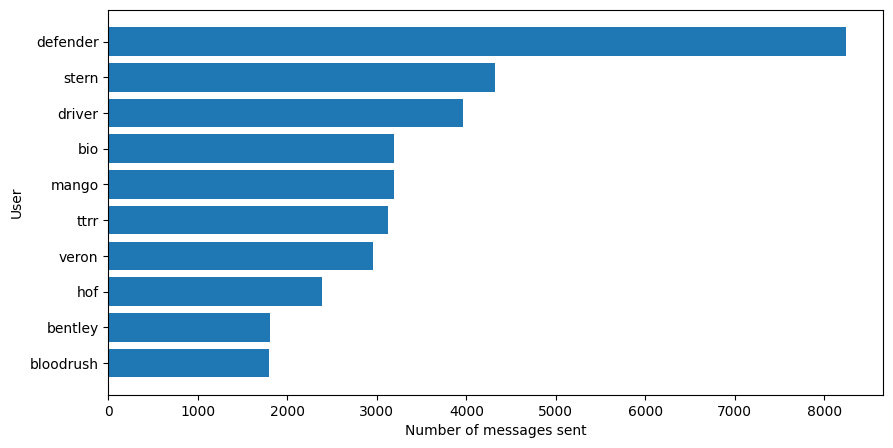

In [500]:
per_person = chats[['from']].value_counts().reset_index()
average = int(per_person['count'].mean())
print('Average per person:', average, 'messages')
top_persons = per_person.head(10).sort_values(by='count')
top_persons['from'] = top_persons['from'].apply(to_name)

plt.figure(figsize=(10,5))
plt.barh(top_persons['from'], top_persons['count'])
plt.xlabel("Number of messages sent")
plt.ylabel("User")
plt.show()

Who were having the most conversations?

In [432]:
# sort so the message direction is discarded
friends = pd.DataFrame(tuple(sorted(r)) for r in zip(formatted_from, formatted_to))
friends.agg(' & '.join, axis=1).value_counts()

defender & driver    5147
defender & veron     4314
defender & hof       3035
bio & skippy         2566
bio & tramp          2335
                     ... 
badboy & defender       1
defender & taobao       1
defender & neo          1
answer & defender       1
defender & lom          1
Name: count, Length: 1614, dtype: int64

Visualise who is talking to who as a network.

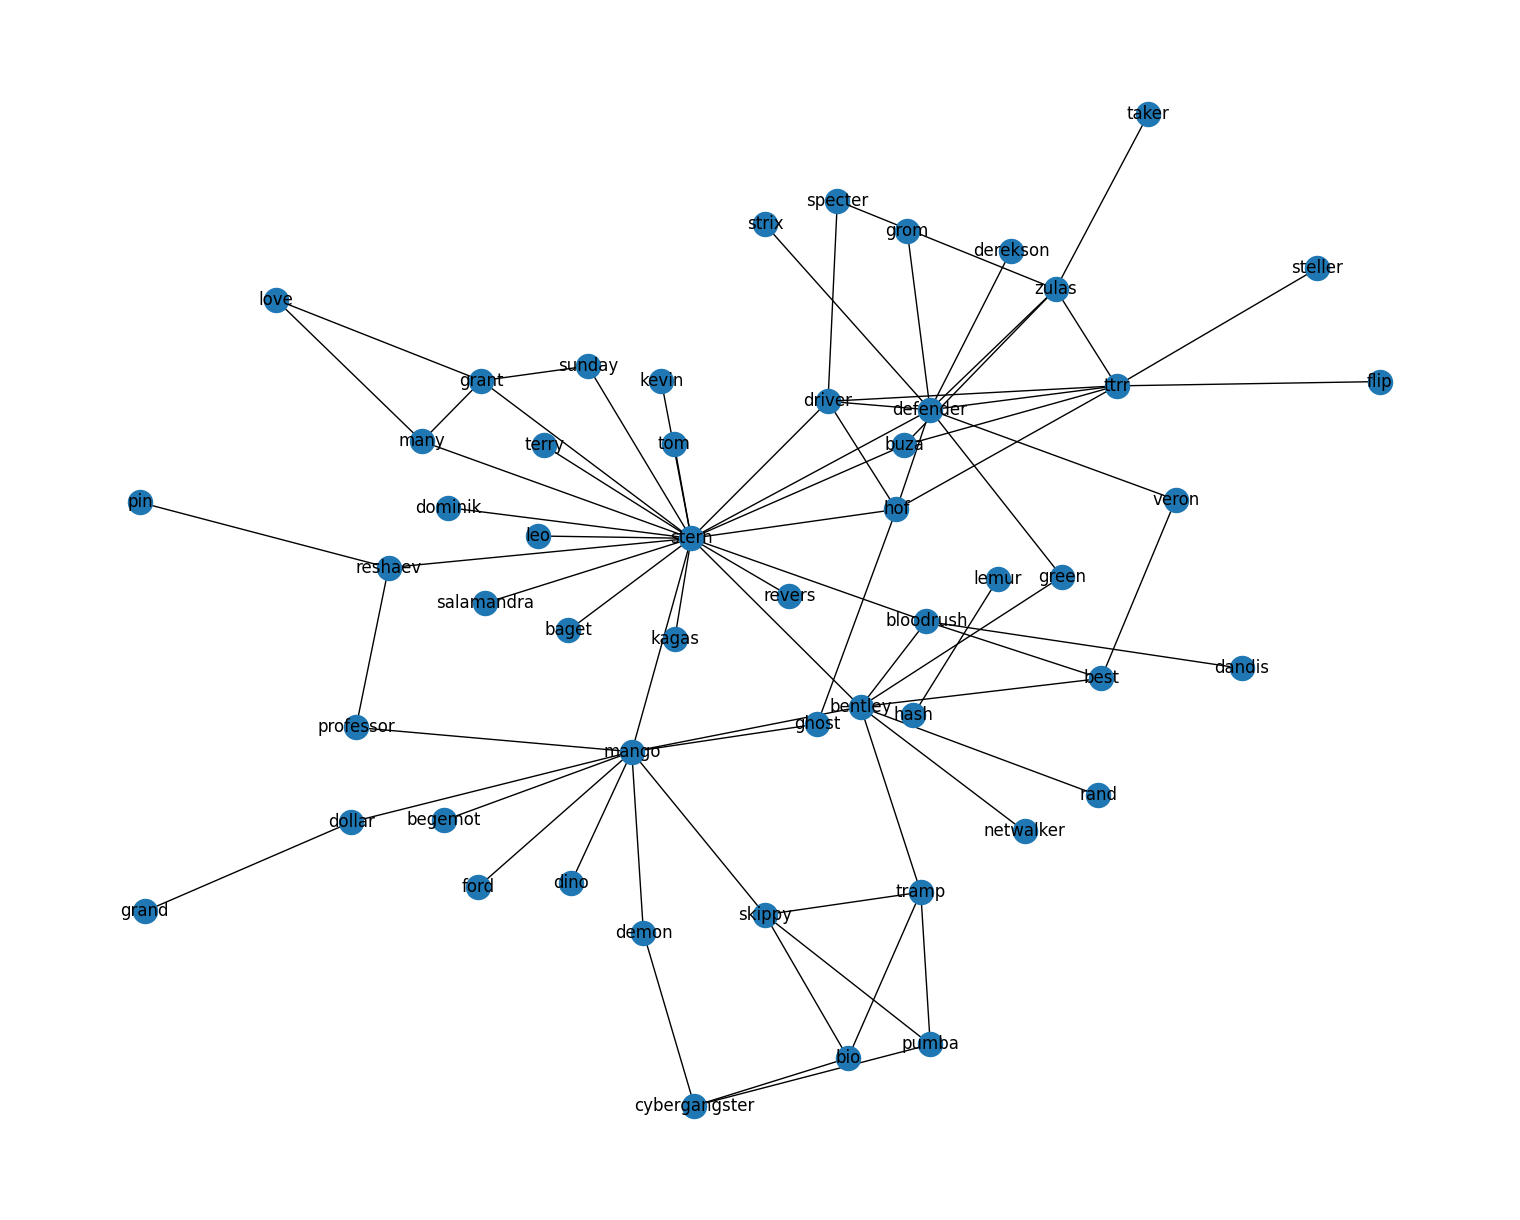

In [483]:
import networkx as nx
import scipy # needed to plot the graph
weighted_friends = friends.groupby([0,1])[1] \
    .count() \
    .reset_index(name='count') \
    .sort_values(by='count', ascending=False)
ngraph = nx.from_pandas_edgelist(weighted_friends.head(75), source=0, target=1, edge_attr='count')
plt.figure(figsize=(15,12))
nx.draw_kamada_kawai(ngraph, with_labels=True)

Stern, Mango and Defender clearly work as the centres of the network.

Let's see how many connections the users have.

In [485]:
pd.DataFrame({'from':formatted_from,'to':formatted_to}).drop_duplicates() \
    .groupby('from')['from'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(by='count', ascending=False)

,from,count
59,defender,226
229,stern,218
148,mango,116
21,bentley,67
205,revers,52
...,...,...
159,max17,1
207,romanov_2,1
206,romanov,1
204,revan,1


Now we will analyse all texts between **Defender** and **Stern** to figure out their roles.

In [501]:
def get_conversations(user1, user2):
    return chats[chats['from'].str.contains(user1 + '|' + user2) \
                 & chats['to'].str.contains(user1 + '|' + user2)] \
        [['from', 'body_en', 'ts']] \
        .sort_values(by='ts')

get_conversations('defender', 'stern')

,from,body_en,ts
41050,defender@q3mcco35auwcstmt.onion,Ok,2021-01-29T14:10:35.428887
41051,defender@q3mcco35auwcstmt.onion,on sunday what to do?,2021-01-29T14:10:43.743213
41056,defender@q3mcco35auwcstmt.onion,Ok,2021-01-29T15:19:40.874614
41057,defender@q3mcco35auwcstmt.onion,on sunday what to do?,2021-01-29T15:19:40.876383
20734,stern@q3mcco35auwcstmt.onion,add mango to rocket to research,2021-02-23T10:24:40.138432
...,...,...,...
22321,stern@q3mcco35auwcstmt.onion,delete buran@,2021-11-30T15:10:22.358720
22348,defender@q3mcco35auwcstmt.onion,acc monk for admin dooms in 6gr,2021-11-30T18:23:12.761765
17181,defender@q3mcco35auwcstmt.onion,for ford acc dino in 6gr - dll glues with dock...,2021-12-02T18:18:06.040364
49866,defender@q3mcco35auwcstmt.onion,to reverse acc flint his team lead in 6gr,2021-12-06T20:47:18.922249


It becomes clear that **Defender** is some kind of system admin. They receive a bunch of requests to perform overall system tasks like creating accounts and updating servers.

Now let's look at the conversations between **Mango** and **Stern**.

In [502]:
get_conversations('mango', 'stern')

,from,body_en,ts
41011,mango@q3mcco35auwcstmt.onion,"don&#39;t forget about cue balls, kosh is high...",2021-01-29T00:06:46.929363
41012,mango@q3mcco35auwcstmt.onion,Hey,2021-01-29T04:04:39.308133
41013,mango@q3mcco35auwcstmt.onion,bits are not enough for everything ..,2021-01-29T04:04:43.474243
41042,mango@q3mcco35auwcstmt.onion,Hey,2021-01-29T13:18:45.239072
41043,mango@q3mcco35auwcstmt.onion,bits are not enough for everything ..,2021-01-29T13:18:45.240176
...,...,...,...
21894,mango@q3mcco35auwcstmt.onion,"Hey! well, I’m recovering from pain, I’ll defi...",2021-11-26T22:05:21.204271
21895,mango@q3mcco35auwcstmt.onion,"I&#39;m moving to a new laptop, does it make s...",2021-11-26T22:05:45.293311
22296,mango@q3mcco35auwcstmt.onion,"Hey! well, the pain is recovering less, I will...",2021-11-30T14:37:48.645273
22297,mango@q3mcco35auwcstmt.onion,"I&#39;m moving to a new laptop, does it make s...",2021-11-30T14:37:48.649226


From these messages we can conclude that **Mango** has some kind of managing function. Mango talks about technical things, mentions botnets and requests money for salaries. This would mean **Stern** is responsible for distribution of money.

## Frequency

Let's visualize the frequency of our messages

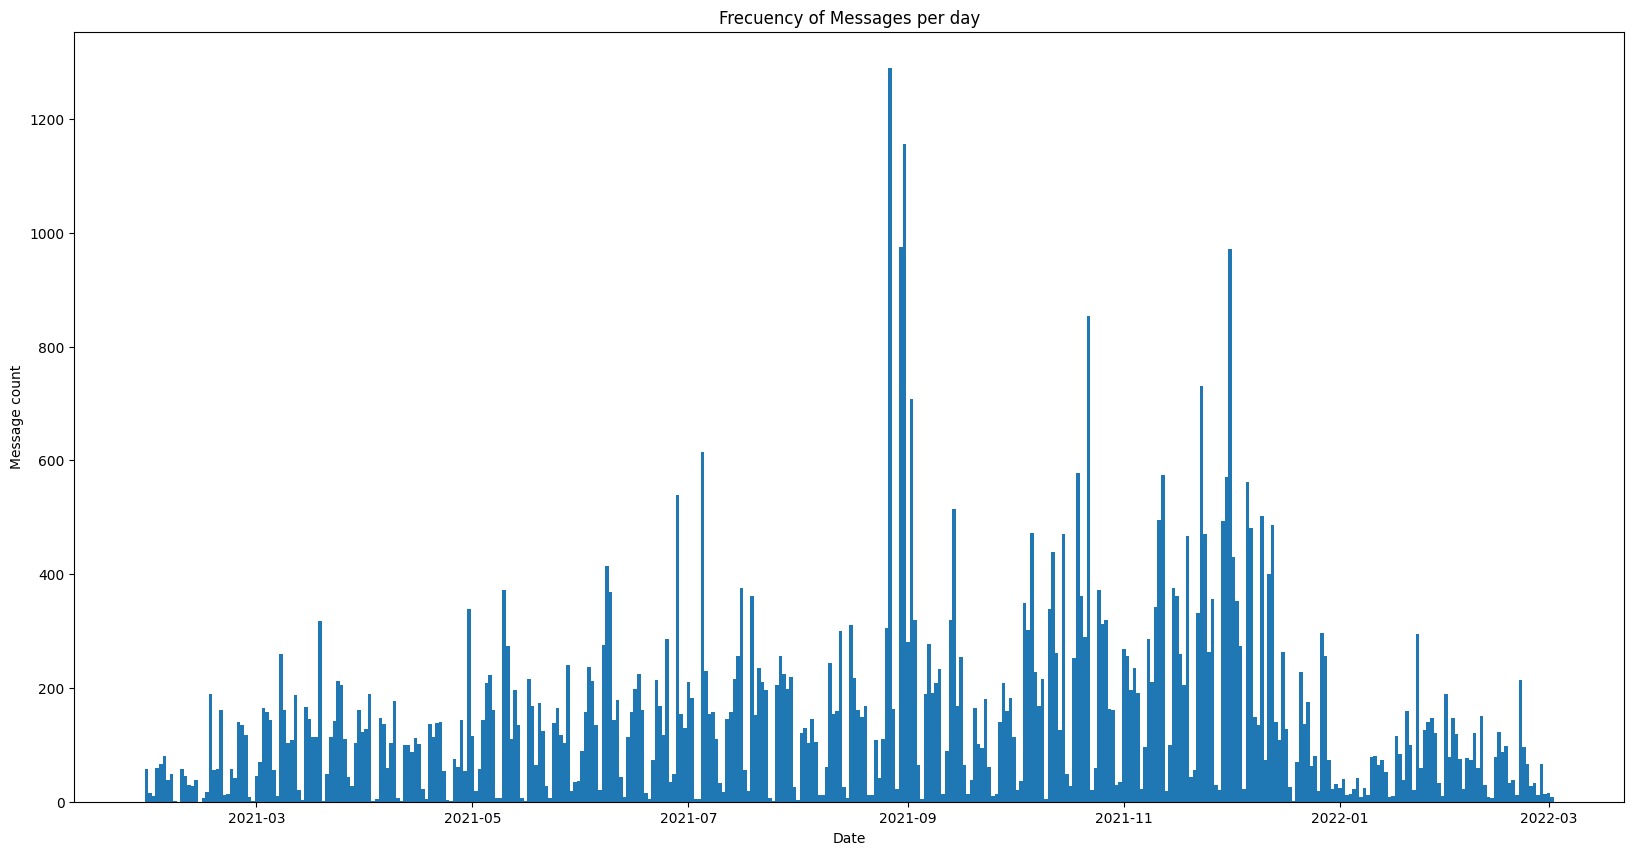

In [207]:
daily_message=chats.groupby(chats['ts'].dt.date).count()
plt.figure(figsize=(20,10))
# plt.plot(daily_message.index, daily_message['ts'], marker='o', linestyle='-')
plt.bar(daily_message.index, daily_message['ts'], width=1)
plt.xlabel("Date")
plt.ylabel("Message count")
plt.title("Frecuency of Messages per day")
plt.show()

Let's further investigate these peaks around September 2021.

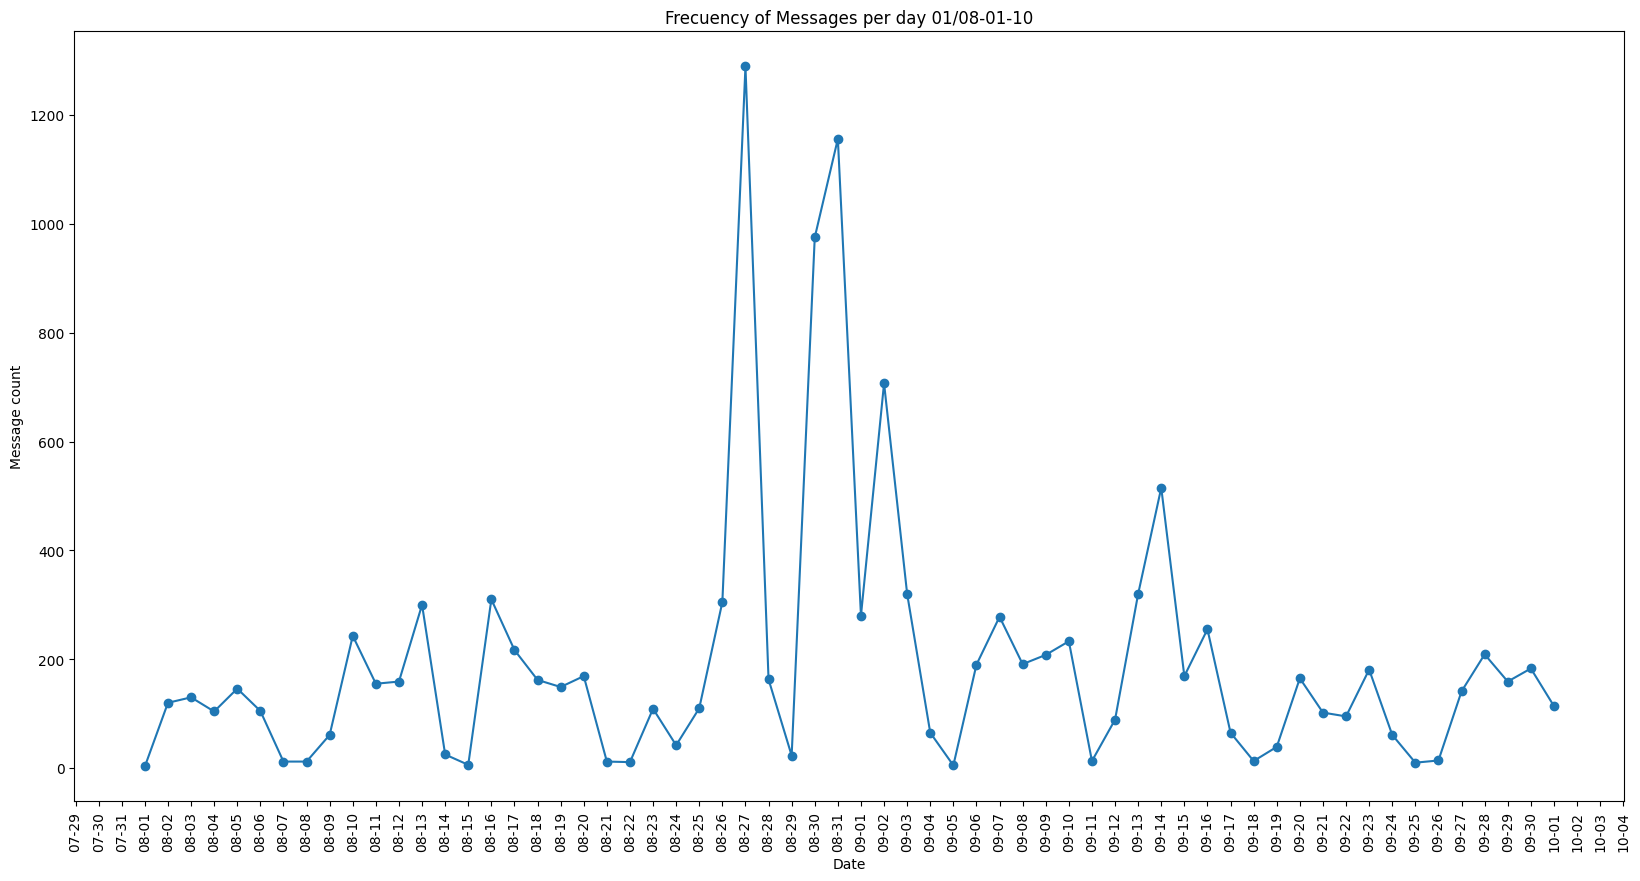

In [11]:
import matplotlib.dates as mdates
start_date = datetime.date(2021,8,1)
end_date = datetime.date(2021,10,1)

filtered_daily_message = daily_message[(daily_message.index >= start_date) & (daily_message.index <= end_date)]
plt.figure(figsize=(20,10))
plt.plot(filtered_daily_message.index, filtered_daily_message['ts'], marker='o', linestyle='-')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set the interval to 1 day
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.xticks(rotation=90)

plt.xlabel("Date")
plt.ylabel("Message count")
plt.title("Frecuency of Messages per day 01/08-01-10")
plt.show()

Let's look at the Linguistics of the messages

In [12]:
messages_peak = chats['body_en']
messages_peak = messages_peak[(messages_peak != '[Error: The message is encrypted and cannot be decrypted.]') & (messages_peak !='[ERROR: This message is encrypted, and you are unable to decrypt it.]')]

In [17]:
import nltk
import string
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words by frequency

In [19]:
messages_str = ' '.join(messages_peak)
words = nltk.word_tokenize(messages_str)
cleaned_words = [word for word in words if word not in stop_words and word not in string.punctuation]

fd = nltk.FreqDist(cleaned_words)
fd.most_common(20)

[('I', 8650),
 ('39', 5310),
 ('Hey', 2930),
 ('everything', 1801),
 ('https', 1669),
 ('’', 1598),
 ('need', 1426),
 ('write', 1347),
 ('work', 1304),
 ('new', 1256),
 ('already', 1148),
 ('bro', 1123),
 ('Hello', 1105),
 ('1', 1026),
 ('2', 1008),
 ('domain', 994),
 ('server', 986),
 ('like', 973),
 ('hello', 966),
 ('3', 963)]

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...


True

What is the mood of the messages?

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(messages_str)

{'neg': 0.062, 'neu': 0.82, 'pos': 0.118, 'compound': 1.0}

See if we can find important information in the text

In [22]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [23]:
persons = []
organizations = []
gp_entity = []
locations = []
other = []

pos_tagged = nltk.pos_tag(words)
ne_tagged = nltk.ne_chunk(pos_tagged)
for ne in ne_tagged:
    if hasattr(ne, "label"):
        if ne.label() == "PERSON":
            persons.append(ne[0:][0])
        elif ne.label() == "ORGANIZATION":
            organizations.append(ne[0:][0])
        elif ne.label() == "GPE":
            gp_entity.append(ne[0:][0])
        elif ne.label() == "LOCATION":
            locations.append(ne[0:][0])    
        else:
            other.append([ne.label(), ne[0:][0]])

print("persons \n", persons)
print("organizations \n", organizations)
print("Geo political Entity \n", gp_entity)
print("locations \n", locations)
print("other \n", other)

persons 
 [('Kriptanem', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Test', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Simka', 'NNP'), ('Hello', 'NNP'), ('First', 'NNP'), ('Ready', 'JJ'), ('Trick', 'NNP'), ('Koba', 'NNP'), ('Vlad', 'NNP'), ('Vlad', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Готово', 'NNP'), ('Bro', 'NNP'), ('Trick', 'NNP'), ('Troika', 'NNP'), ('Koba', 'NNP'), ('Buildmachine', 'NNP'), ('Hey', 'NNP'), ('Derek', 'NNP'), ('Ef6H', 'NNP'), ('Client', 'NNP'), ('Klaus', 'NNP'), ('Klaus', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Geez', 'NNP'), ('Understood', 'NNP'), ('Too', 'NNP'), ('Hey', 'NNP'), ('Write', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Buzu', 'NNP'), ('Buterin', 'NNP'), ('Noah', 'NNP'), ('Well', 'NNP'), ('Frantir', 'NN'), ('Swift', 'NNP'), ('Sucks', 'NNP'), ('Hello', 'NNP'), ('Hof', 'NNP'), ('Dowload', 'NNP'), ('Gh

# Analysing message contents

Now let's look for certain things in the messages.

In [503]:
def find_in_messages(column, regex, data=filtered_chats, extract=False):
    if extract:
        return data[column].str.extractall(regex).dropna()
    else:
        return data[data[column].str.contains(regex, regex=True, case=False)]

## Bitcoin wallets

Extract all the bitcoin wallet addresses.

In [504]:
bitcoin_wallets = find_in_messages('body_en', r'(?:^|\s)(?P<bitcoin>(?:bc1|[13])[a-zA-HJ-NP-Z0-9]{25,59})(?:$|\s|\.|,)', extract=True)
bitcoin_wallets.groupby('bitcoin')['bitcoin'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(by='count',ascending=False)

,bitcoin,count
74,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,45
86,3N4oho2uXfkFBfUAPtoPGLUXjHXqXV4vrJ,7
164,bc1qkmyv5860pe24h9ytadkzgqltkjuuk9z9s027df,6
19,1DSp4woswZECAL9zdmmGeu1s7k1sGExFDh,5
27,1HtyXyCrshiJmLYNru7atpDMJrzG9mzwzf,5
...,...,...
101,bc1q3efl4m2jcr6gk32usxnfyrxh294sr8plmpe3ye,1
102,bc1q3hefqfvzfdnagwr9dkxphlz2xs6zem5r87hygh,1
103,bc1q3j4rq3k5d7ru85pecqtahcndkgx530e3g54633,1
105,bc1q3ts2gkcfcx8a007gclltdcc47f9j4sx68cf7zn,1


Identify which user mentioned which address the most.
This could give an insight into who owns which address.

In [507]:
# get who mentioned which address
mentions_address = filtered_chats[['from']] \
    .join(bitcoin_wallets['bitcoin'].unstack()) \
    .set_index('from') \
    .dropna(how='all') \
    .reset_index()
# format users' names
mentions_address['from'] = mentions_address['from'].apply(to_name)
# count who mentioned which address the most
pd.melt(mentions_address, id_vars=['from']) \
    .groupby(['value','from'])['value'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(by='count', ascending=False) \
    .drop_duplicates(['value']) \
    .rename(columns={'value':'address','from':'user','count':'mentions'})

,address,user,mentions
76,3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ,many,39
90,3N4oho2uXfkFBfUAPtoPGLUXjHXqXV4vrJ,many,7
170,bc1qkmyv5860pe24h9ytadkzgqltkjuuk9z9s027df,mango,6
19,1DSp4woswZECAL9zdmmGeu1s7k1sGExFDh,lemur,5
27,1HtyXyCrshiJmLYNru7atpDMJrzG9mzwzf,mavemat,5
...,...,...,...
104,bc1q33uvkjlvyks7d2p3v5fz5xl3j0sazrsdh7qdn5,carter,1
105,bc1q3efl4m2jcr6gk32usxnfyrxh294sr8plmpe3ye,viper,1
106,bc1q3hefqfvzfdnagwr9dkxphlz2xs6zem5r87hygh,sticks,1
107,bc1q3j4rq3k5d7ru85pecqtahcndkgx530e3g54633,sonar,1


Let's get the account balances of the bitcoin wallets.

In [509]:
# TODO: scrape account balances using some API

## Email addresses

Extract email addresses

In [297]:
email_addresses = find_in_messages('body',r'(?P<address>[\w\-\.]+@(?:[\w-]+\.)+[\w-]{2,})', extract=True)
email_addresses.value_counts()

address                             
root@195.149.87.59                      54
hors@q3mcco35auwcstmt.onion             53
cybergangster@q3mcco35auwcstmt.onion    40
zevs@q3mcco35auwcstmt.onion             23
revers@q3mcco35auwcstmt.onion           20
                                        ..
ebekka@ro.ru                             1
elvira@q3mcco35auwcstmt.onion            1
ewok555@protonmail.com                   1
fillemand@protonmail.com                 1
hash@q3mcco35auwcstmt.onion              1
Name: count, Length: 205, dtype: int64

Those without .onion

In [298]:
email_addresses[~email_addresses['address'].str.contains('.onion')].value_counts()

address                     
root@195.149.87.59              54
grave@jabber.hot-chilli.eu      18
gpbit@thesecure.biz             17
rdpcorp_@thesecure.biz          12
eldorado@count0.ws              10
                                ..
arturh76@jabber.ru               1
armata@exploit.im                1
aravancargo1@proloads.com        1
antonis.myrsaliotis@ppdi.com     1
flourish@nibblefish.net          1
Name: count, Length: 152, dtype: int64

A lot of temporary or secure (e.g. protonmail) email addresses are used.

## Websites

Extract all URLs

In [299]:
urls = find_in_messages('body', r'(?P<url>https?:\/\/(?P<website>(?:(?:[a-z\d\-A-Z]+(?:\.[a-z\d\-A-Z]+)*)\.)?(?:[a-z\d\-A-Z]+)\.(?:[a-z]{2,}))\/?(?:[\w&=\-.~:/?#\[\]@!$\'()*+,;%]*)?)', extract=True)
urls['url'].value_counts()

url
https://my-ppl.com                                                        9
http://contirecj4hbzmyzuydyzrvm2c65blmvhoj2cvf25zqj2dwrrqcq5oad.onion/    6
https://qaz.im/load/HFsTyy/bDhia9                                         6
https://www.youtube.com/watch?v=HV7sjEDlMKs                               6
https://www.youtube.com/watch?v=aPfd6-4F1xU                               5
                                                                         ..
https://privnote.com/8mqQH5sF#6bcItLsSP                                   1
https://qaz.im/index.php?a=delete&q=1926224143                            1
https://qaz.im/load/tR37RF/8DQ5eb                                         1
https://qaz.im/zaq/yt25YTTQ#yeH6Qae3                                      1
https://qaz.im/zaq/HNZeaBrb#ah7eea69                                      1
Name: count, Length: 1053, dtype: int64

List most common domains

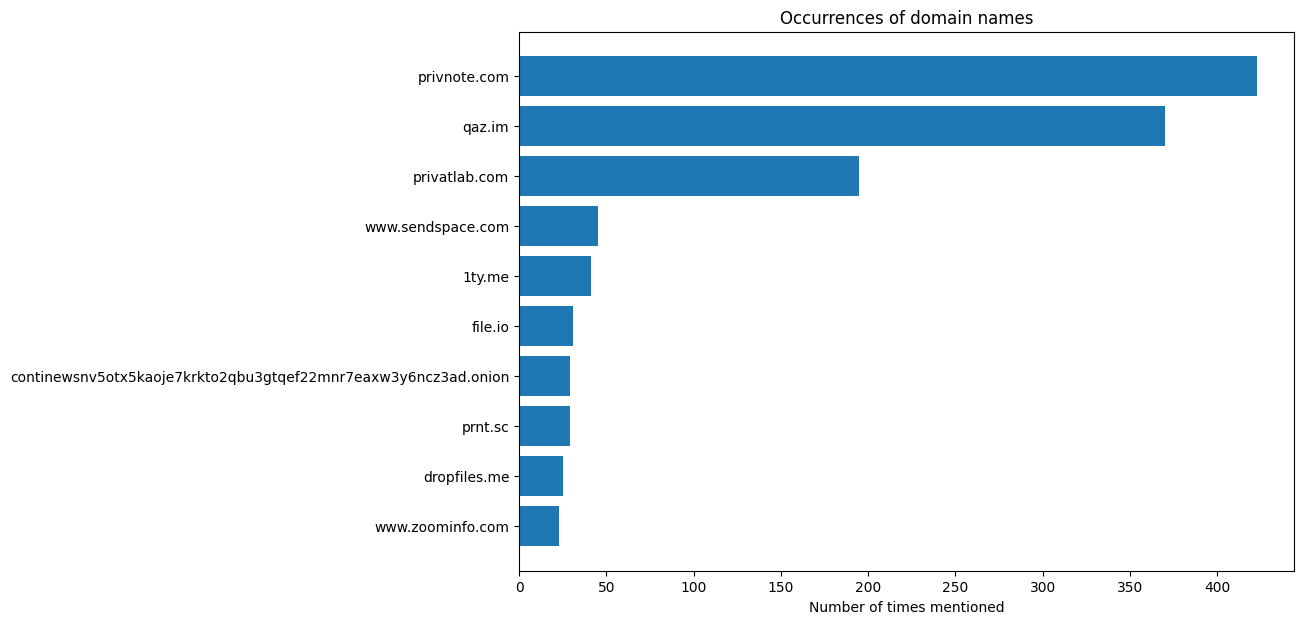

In [325]:
websites = urls.groupby('website')['website'].count().reset_index(name="count").sort_values(by='count')
top_websites = websites.tail(10)

plt.figure(figsize=(10,7))
plt.barh(top_websites['website'], top_websites['count'])
plt.title('Occurrences of domain names')
plt.xlabel('Number of times mentioned')
plt.show()

It is interesting to see that almost all the commonly-used websites are those that provide temporary services such as filesharing, email address and/or notes.

## IP-addresses (IPv4)

In [281]:
find_in_messages('body', r'(?:^| )(?P<ip>(?:(?:25[0-5]|(?:2[0-4]|1\d|[1-9]|)\d)\.?\b){4})', extract=True).value_counts()

ip            
203.76.105.227    7
200.58.180.138    5
174.238.4.80      3
188.241.120.42    3
185.244.41.9      2
                 ..
185.64.106.247    1
185.64.104.216    1
185.25.51.99      1
185.25.48.83      1
198.46.198.9      1
Name: count, Length: 95, dtype: int64

## Credit cards

Extract credit card numbers and check if they are valid using the Luhn algorithm

In [274]:
def luhn(card):
    n = len(card)
    s = 0
    is2 = False
    for i in range(n - 1, -1, -1):
        d = ord(card[i]) - ord('0')
        if is2:
            d *= 2
        s += d // 10 + d % 10
        is2 = not is2
    return s % 10 == 0

rex = r"(\d{4})[^\da-zA-Z]*(\d{4})[^\da-zA-Z]*(\d{4})[^\da-zA-Z]*(\d{4})"
cc = pd.Series(c for c in find_in_messages('body', rex, extract=True).agg(''.join, axis=1) if luhn(c))
cc.value_counts()

5345645346567758    15
1410513075163984     6
2299459721632648     2
1648826630163032     2
4847187247511599     2
4890494755979846     1
2437611876451504     1
4276550017637367     1
4890494733526362     1
4890494740805551     1
Name: count, dtype: int64